# <center><div style="font-family: Trebuchet MS; background-color: #371f41; color: white; padding: 12px; line-height: 1;">[AI Team] assignment - WideBot' Summer Internship 2023</div></center>


<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
    
  <h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home" style="font-family: Trebuchet MS; background-color: #371f41; color: white; line-height: 1;">Table of Contents</h3>

</div>


* [1. Instructions](#1)

* [2. Importing Libraries](#2)  

* [3. Loading Data](#3)

* [4. Data Exploration](#4) 

* [5. Data Preprocessing](#5)
      
* [6. Exploratory Data Analysis](#6)
    
* [7. Modeling](#7)

* [8. Final Results](#8)


    


<a id="1"></a>
### __Task 2 - EDA:__

* Using this dataset, you are supposed to prepare an Exploratory Data Analysis (EDA) report
in PDF format that shows at least 3 different insights about this data (number of examples
per class, top frequent n-grams generally and per class, lengths of examples in words and
letters, ....) . Feel free to show your insights in a good format (description, tables, charts,
...).
* Note that you can prepare the PDF manually after generating the analytics in any other format (CSV, xls, doc), ...).
* Note: Use stories data only (not comments).

#### __Task 3 - Classification:__

*Using the same data in task 2, build a machine learning based classifier and show its
performance on the test-set. Show precision, recall, f-score, accuracy for each class and for
the whole test data. Please describe briefly the meaning of each result and metric for this
specific task. Also, please write some enhancements that you may think about to achieve
better results.
* Note: add a readme file that describes the whole training process in briefed points. Note:
* Use stories data only (not comments). Also, take the last 20% of each file as a test-set.

<a id="2"></a>
### <font style="font-family: Trebuchet MS; background-color: #371f41; color: white; padding: 12px; line-height: 1;"> :::    Importing Libraries ::: </b></font>

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
from collections import Counter

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from pyarabic.araby import strip_tashkeel, normalize_ligature, strip_tatweel

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AmirFPS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AmirFPS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<a id="3"></a>
### <font style="font-family: Trebuchet MS; background-color: #371f41; color: white; padding: 12px; line-height: 1;"> :::    Loading Data ::: </b></font>

In [2]:
# create an empty list to hold all the dataframes
dfs = []

# get a list of all CSV files in the data directory
data_dir = "data"
csv_files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]

# loop through the CSV files and append each one to the list of dataframes
for file in csv_files:
    file_path = os.path.join(data_dir, file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# concatenate all the dataframes together into one dataframe
combined_df = pd.concat(dfs)

In [3]:
df = combined_df[['story','topic']].copy()

<a id="4"></a>
### <font style="font-family: Trebuchet MS; background-color: #371f41; color: white; padding: 12px; line-height: 1;"> :::    Data Exploration ::: </b></font>

In [4]:
# print a sample of the combined dataframe
df.sample(2)

,story,topic
32,استأنفت وزارة الصحة مسلسل حوارها الاجتماعي مع النقابات القطاعية بعد تعثر شاب نقاشات الطرفين خلال آخر جولة، وتوقيف الجلسات التي انطلقت منذ بداية جائحة كورونا ولم تخرج بمستجدات لفائدة شغيلة القطاع الصحي.والتقت المركزيات النقابية بداية بمديرية الموارد البشرية، في أفق عرض الملف كاملا على وزير الصحة، وقد جرى الاجماع بشأن الرفع من مبلغ التعويض عن الأخطار المهنية بما يضمن التوحيد والمساواة لجميع الهيآت المهنية العاملة بوزارة الصحة.وحسب مصادر نقابية، فقد تمثل هذا التعديل في تحديد مبلغ التعويض المقترح، وإدراج هيئة الأطباء والصيادلة وجراحي الأسنان ضمن قائمة المستفيدين من التعويض عن الأخطار المهنية، بعد إخراج هذا التعويض من نظام التعويضات الحالي المحدد في نظامهم الأساسي جاري به العمل.وأضافت المصادر ذاتها، في حديث مع هسبريس، أن اللجنة اتفقت بالإجماع على الزيادة في قيمة التعويض عن الأخطار المهنية ليبلغ 4000 درهم وتوحيده بالنسبة لجميع العاملين في قطاع الصحة العمومي، ويضاف مبلغ الزيادة إلى الأجر الصافي الحالي الذي تتقاضاه كل هيئة على حدة.ومن المرتقب إعادة صياغة مشروع المرسوم المتعلق بالممرضين ذوي السنتين، الذي أعدته وزارة الصحة مؤخرا بشكل منفرد وتم رفضه، بغية إنصاف هذه الفئة من خلال الأخذ بعين الاعتبار أفضل الاقتراحات التي تقدمت بها الهيئات النقابية والأكثر فائدة لهذه لها.وجرى الاتفاق كذلك على الترقية في الدرجة لكل الممرضين ذوي السنتين كيفما كان ترتيبهم، وتطبيق مشروع المرسوم بأثر رجعي منذ 26 أكتوبر 2017، تاريخ صدور النظام الأساسي الخاص بهيئة الممرضين وتقنيي الصحة.بالإضافة إلى الاتفاق على إعداد نظام أساسي خاص بهيئة المساعدين الطبيين طبقا للصيغة التي صادقت عليها اللجنة الموضوعاتية الخاصة بهذه الهيئة، وتحديد المهام المنوطة بهم وفقا للمؤهلات والشواهد المحصل عليها (ماستر، دكتوراه...).وأوضحت المصادر نفسها أنه جرى الاتفاق كذلك على عقد اجتماع ثالث للجنة المركزية للحوار الاجتماعي ما بين 5 و9 أكتوبر 2020، ودعوة لجنة القيادة المؤلفة من وزير الصحة والكتاب العامين للهيئات النقابية إلى عقد اجتماع مستعجل للبت في النقط المطلبية ذات الأثر المالي المتفق بشأنها والمقترحة من قبل اللجنة المركزية للحوار الاجتماعي.,societe
36,"يُواصل محور بريتوريا-الجزائر نهجه العدائي ضد الوحدة الترابية للمملكة المغربية؛ إذ لم يتغير خطاب كل من عبد المجيد تبون، رئيس الجزائر، وسيريل رامافوزا، رئيس جنوب إفريقيا، تجاه ملف الصحراء المغربية أمام الدورة الخامسة والسبعين للجمعية العامة للأمم المتحدة.وفي الوقت الذي تستبعدُ فيه جل قرارات مجلس الأمن الدولي والأمم المتحدة أي نقاش حول ""الاستقلال"" أو ""الاستفتاء""، وهو ما تأكد من خلال خلاصات المشاورات الأخيرة التي أجراها المبعوث المستقيل هورست كولر، دعا الرئيس الجزائري إلى ""إجراء استفتاء تقرير المصير في الصحراء الغربية المؤجل منذ أكثر من 29 سنة""، بتعبيره.وتجاهل الرئيس تبون دور الجزائر باعتبارها طرفاً أساسياً في النزاع باعتراف أممي، وعبّر في خطاب مسجل ألقاه أمام الدورة الـ 75 للجمعية العامة للأمم المتحدة، عن أسفه ""لما تعرفه قضية الصحراء من عقبات تعرقل تسويتها، لا سيما توقف المفاوضات بين طرفي النزاع والتماطل في تعيين مبعوث أممي جديد"".وعلى المنحى العدائي نفسه سارت جنوب إفريقيا خلال اجتماعات الجمعية العامة للأمم المتحدة، وجددت دعمها لجبهة البوليساريو الانفصالية، وطالب رئيسها سيريل رامافوزا بـ""إنهاء الاحتلال"" في الأقاليم الصحراوية المغربية.وتعتبر الجزائر وجنوب إفريقيا أكبر داعم لجبهة البوليساريو الانفصالية، وهو ما يعيق تعزيز الاندماج على الصعيدين المغاربي والإفريقي؛ إذ تقدر الكلفة الاقتصادية والسياسية والاجتماعية الناتجة عن تعثر اندماج المنطقة المغاربية بما يقارب 2.8 في المائة من الناتج المحلي الإجمالي لكل دولة.وبات المنتظم الدولي مقتنعاً بأن ""الاستفتاء"" وفق المقاربة الانفصالية حل لا يمكن تطبيقه على أرض الواقع وليس عملياً، بالنظر إلى تشبث الساكنة الصحراوية بالسيادة المغربية في إطار مقترح الحكم الذاتي، وهو ما دفع الأمم المتحدة من خلال بعثة ""المينورسو"" إلى التراجع عن تنظيم الاستفتاء منذ سنة 1991.وكان ناصر بوريطة، وزير الشؤون الخارجية والتعاون الإفريقي والمغاربة المقيمين بالخارج، أكد خلال نهاية المائدة المستديرة الثانية بجنيف أن ""أي حل خارج السيادة المغربية على صحرائه مستبعد نهائياً""، مشيراً إلى أن هذه المائدة تحت إشراف هورست كولر ""كانت لها ميزة تفكيك بعض الأساطير مثل (الحق في تقرير المصير) أو (الاستفتاء) أو (الاستقلال)"".",politique


In [5]:
df.shape

(11000, 2)

In [6]:
df.isna().sum()

story    0
topic    0
dtype: int64

In [7]:
df.duplicated().sum()

4

In [8]:
# identify duplicated rows
duplicated_rows = df[df.duplicated()]
duplicated_rows

story  \
60                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 جدّد عبد اللطيف الجواهري، والي بنك المغرب، الدعوة إلى اعتماد إجراءات تحفيزية لدعم مشروع الأداء عبر الهاتف النقال، الذي أصبح منظومة جاهزةً منذ مدة، لكن إطلاقه على نطاق واسع لم يتم بعد.وأشار الجواهري، في ندوة صحافية رقمية عقدها الثلاثاء عقب اجتماع مجلس البنك، أن الأداء عبر الهاتف يعتبر من الحلول الأساسية لمحاربة تداول النقد (الكاش) الذي ارتفع منذ بدء الجائحة.وأكد والي بنك المغرب أن اعتماد الأداء عبر الهاتف سيمكن من خفض وقت معالجة العمليات وتكلفتها، كما شدد على أنه مهم من أجل تحقيق الشمول المالي الذي يسعى إليه المغرب.وذكر الوالي أن المغرب حالياً يتوفر على 1.5 محفظة (m-wallet) خاصة للأداء عبر الهاتف، وزاد: "على المستويين التقني والمؤسساتي كل شيء أصبح جاهزاً، لكن على البرلمان أن يُقر إجراءات تحفيزية لتشجيع التجار على الانخراط في هذه المنظومة، لأننا ضيعنا وقتاً طويلاً".واقترح المتحدث اعتماد إجراءات تحفيزية على المستوى الضريبي لتشجيع الانخراط في الأداء عبر الهاتف، وإطلاق عملية تجريبية في إحدى الجهات من أجل الوقوف عليها نتائج العملية وفوائدها.وأكد الجواهري أ

In [9]:
df.drop_duplicates(inplace=True)

art-et-culture        1000
faits-divers          1000
marocains-du-monde    1000
medias                1000
societe               1000
sport                 1000
tamazight             1000
economie               999
orbites                999
politique              999
regions                999
Name: topic, dtype: int64


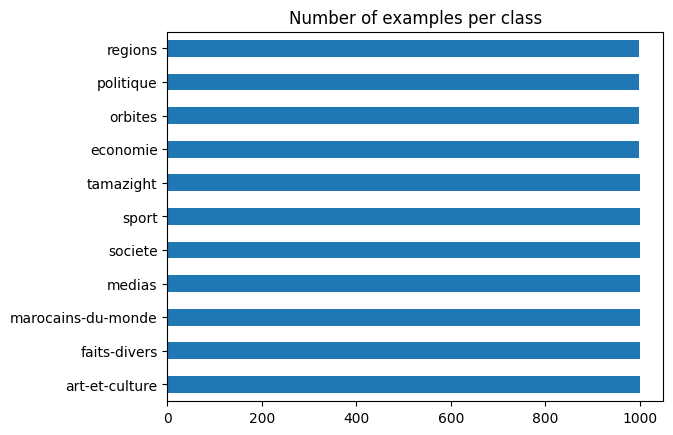

In [10]:
print(df['topic'].value_counts())
df['topic'].value_counts().plot(kind='barh')
plt.title('Number of examples per class')
plt.show()

In [11]:
# # create a regular expression pattern that matches any non-Arabic letter or non-space character
# non_arabic_pattern = re.compile('[^؀-ۿ\s]+')

# # replace any non-Arabic characters in the "text" column with a space
# df['story'] = df['story'].str.replace(non_arabic_pattern, ' ')

## **<center><span style="color:white;background-color:#000000;border-radius: 5px;padding: 5px; font-size: 18pt">1.Viewing Sample with idx-2 before Data Preprocessing</span></center>**

In [12]:
df.iloc[2]

story    تشير مشاهدة فيلم قصير ضمن الثلاثية الأخيرة للمخرج المغربي هشام العسري إلى جملة من المرجعيات الثقافية والأدبية والأسطورية العالمية التي وظفها.كان يا مكان، امرأة بطلة، (Alice)، تائهة في "بلاد العجائب". عقارب الساعة وهي تدور إلى الخلف، صانع القبعات The mad hatter وهو يحاول، بجشع، بيع ما يظن أنه يصنعه، الكلب Bayard متربص ينتظر فرصة للانقضاض على ضحاياه أو ضحيته. إنها المرأة البطلة التي تمشي بحثًا عن المجهول وكأنها تأخذ كلبها في نزهة، أو أنها في حداد على موته، أو لربما هي ببساطة غاضبة أو مجنونة أو أنها أعقل من العقلاء.في الفيلم القصير – بدون عنف Cruelty free – من تأليف وسيناريو وإخراج هشام العسري، (ضمن ثلاثية أفلام قصيرة هي على التوالي: Android and Zombies، The last Arab Movie، Cruelty Free)، مشاهد تبرز قوة المرأة، (شخصية البطلة "ندى" في الفيلم)، وكيف أنها تستطيع مواصلة السير رغم الألم والابتسام رغم الأحزان. تلتقط الكاميرا مشية أنثوية مُختالة وأنيقة بخطى ثابتة، فالحذاء ذو الكعب العالي يؤلم القدمين لكن المرأة تحافظ على مقاييسها وعلى رأسها مرفوعا ككعب حذائها، كما نظَّرت لذلك كوكو شاني

<a id="5"></a>
### <font style="font-family: Trebuchet MS; background-color: #371f41; color: white; padding: 12px; line-height: 1;"> :::    Data Preprocessing ::: </b></font>

In [13]:
# create a regular expression pattern that matches any non-Arabic letter
non_arabic_pattern = re.compile('[^\u0600-\u06FF\s]+')

# replace any non-Arabic letters in the "text" column with an empty string
df['story'] = df['story'].str.replace(non_arabic_pattern, ' ')

In [14]:
# define a translation table that maps each Arabic punctuation mark to a space
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
translation_table = str.maketrans(arabic_punctuations, ' ' * len(arabic_punctuations))

# apply the translation table to the "text" column
df['story'] = df['story'].str.translate(translation_table)

In [15]:
# Replace 2 or more spaces with 1 space
df['story'] = df['story'].replace('\s+', ' ', regex=True)

In [16]:
# define function to normalize arabic text
def normalize_arabic_text(text):
    """
    Normalizes Arabic text by removing diacritics, replacing ligatures with their component letters,
    and removing tatweel characters.
    """
    normalized_text = strip_tashkeel(text)
    normalized_text = normalize_ligature(normalized_text)
    normalized_text = strip_tatweel(normalized_text)
    
    return normalized_text

# define function to remove arabic stop words
def remove_stopwords(text):
    stop_words = set(stopwords.words('arabic'))
    words = word_tokenize(text)
    return ' '.join([word for word in words if word not in stop_words])

# define function to normalize specific letters
def normalize_letters(text):
  text = re.sub('[ى]', 'ي', text)
  text = re.sub('[إأٱآا]', 'ا', text)
  return text

# def remove_newlines_and_tabs(text):
#     cleaned_text = text.replace('\n', '').replace('\t', '')
#     return cleaned_text

# apply functions to 'story' column in our dataframe
df['story'] = df['story'].apply(normalize_arabic_text)
df['story'] = df['story'].apply(remove_stopwords)
df['story'] = df['story'].apply(normalize_letters)

## **<center><span style="color:white;background-color:#000000;border-radius: 5px;padding: 5px; font-size: 18pt">2.Viewing the same Sample with idx-2 after Data Preprocessing</span></center>**

In [17]:
df.iloc[2]

story    تشير مشاهدة فيلم قصير ضمن الثلاثية الاخيرة للمخرج المغربي هشام العسري جملة المرجعيات الثقافية والادبية والاسطورية العالمية وظفها مكان امراة بطلة تائهة بلاد العجائب عقارب الساعة وهي تدور الخلف صانع القبعات يحاول بجشع بيع يظن انه يصنعه الكلب متربص ينتظر فرصة للانقضاض ضحاياه ضحيته انها المراة البطلة تمشي بحثا المجهول وكانها تاخذ كلبها نزهة انها حداد موته لربما ببساطة غاضبة مجنونة انها اعقل العقلاء الفيلم القصير بدون عنف تاليف وسيناريو واخراج هشام العسري ضمن ثلاثية افلام قصيرة التوالي مشاهد تبرز قوة المراة شخصية البطلة ندي الفيلم وكيف انها تستطيع مواصلة السير رغم الالم والابتسام رغم الاحزان تلتقط الكاميرا مشية انثوية مختالة وانيقة بخطي ثابتة فالحذاء الكعب العالي يؤلم القدمين المراة تحافظ مقاييسها وعلي راسها مرفوعا ككعب حذائها نظرت لذلك كوكو شانيل ذاتها قائلة وفجاة يصبح الجمال جريمة السهل اكتشاف الشعور بالجنون السهل السير طريق الانتقام معان سخيفة وسريالية خفي الفيلم اعظم يشتري الزهور يفكك معاني ضاعت دلالاتها الايام تحمله ثقل عنف وعادات وتقاليد واحكام يكون الاهم واقع المجتمع المغربي

<a id="6"></a>
### <font style="font-family: Trebuchet MS; background-color: #371f41; color: white; padding: 12px; line-height: 1;"> :::    Exploratory Data Analysis ::: </b></font>

In [18]:
df.topic.unique().tolist()

['art-et-culture',
 'economie',
 'faits-divers',
 'marocains-du-monde',
 'medias',
 'orbites',
 'politique',
 'regions',
 'societe',
 'sport',
 'tamazight']

In [19]:
# topic encoding
from sklearn.preprocessing import LabelEncoder

# initialize LabelEncoder
encoder = LabelEncoder()

# fit and transform 'topic' column, and add 1 to the encoded labels
df['topic_encoded'] = encoder.fit_transform(df['topic']) + 1
df[['topic','topic_encoded']].sample(10)

,topic,topic_encoded
895,regions,8
687,marocains-du-monde,4
496,medias,5
299,medias,5
972,orbites,6
756,economie,2
406,medias,5
481,marocains-du-monde,4
261,art-et-culture,1
905,regions,8


In [20]:
df.head(3)

,story,topic,topic_encoded
0,وجه بيت الشعر المغرب وزير الثقافة والشباب والرياضة رسالة موسومة لماذا تحولت احلام بيضاء كوابيس سوداء اشار خلالها بيت الشعر تاسس سنة بهدف تحقيق جملة الاهداف تروم جميعها تعزيز مكانة الشعر المجتمع والحياة وترسيخ مكانته الناس كحامل لقيم الحلم والخيال الاهداف توطين الشعر المغربي المقررات الدراسية وتشجيع التلاميذ والطلبة قراءته وتذوق جمالياته اللحظة ينتصر لكل مدهش وانساني وجاء الرسالة توصلت هسبريس بنسخة بيت الشعر نجح المغرب خلال مسيرته الطويلة تمتد مدي ربع قرن اقناع المنظمة العالمية للتربية والثقافة والعلوم اليونيسكو باحداث يوم عالمي للشعر طريق المقترح تقدم تبنته الحكومة المغربية عهد الراحل عبد الرحمان اليوسفي نجح ضمان مكانة عالمية لجائزته الشعرية المعروفة الاركانة شعراء العالم يتطلعون للفوز علاوة انتظام منشوراته الشعرية ومجلته الرصينة البيت واستدامة برامجه الشعرية بالتعاون عدد الشركاء امنوا بجدية مشروع مؤسستنا وجودة مستواه فنيا وجماليا واشارت الرسالة ذاتها انه سعيا بيت الشعر المغرب تقديم خدمة جديدة للشعر المغربي بربطه بالفضاء الابداعي العام وخاصة الموسيقي والغنائي واستعادة لحظات طيبة الذكر تعانق شعرنا المغربي عبد الرفيع جواهري وادريس الجاي والخمار الكنوني وحسن المفتي واحمد الطيب لعلج وعلي الحداني اوتار والحان عبد السلام عامر وعبد النبي الجيراري وحسن القدميري تقدم بمشروع فني عنوان احلام بيضاء واوضح بيت الشعر المشروع عبارة مقطوعات غنائية جعلت الشعر المغربي متنا بهدف استعادة ماض جميل اثري خلاله الشعراء المغاربة السجل الشعري للاغنية المغربية فقد منحوها قصائد تحولت خلال اوتار ملحنين مقتدرين اغان تتردد السنة وشفاه الناس المناسبات والافراح والاعراس بعضها سيحظي باهتمام مطربين مشارقة اعادوا اداءها وتسجيلها جديد باصواتهم وورد الرسالة ذاتها انه نجاح يتحق الشعراء كتبوا قصائدهم داخل تجربتهم الانسانية وفي افق الرؤية امتلكوها اللغة والمجتمع والكون وليس الطلب ارغامات سوق الغناء وحسب الرسالة ذاتها فانه لاول مرة تاريخ برنامج الوزارة لدعم الاغنية المغربية تتقدم هياة متخصصة كبيت الشعر المغرب بمشروع رؤية مندمجة تربط الشعر المغربي بافقه الفني يحظي بمساحة اوسع للانتشار عبر الاغنية يصير بمقدور الجمهور المغربي يتعرف شعرائنا المغاربة خلال دواوينهم الشعرية عبر امسياتهم الثقافية خلال الاغنية كلحظة فنية تتجمع وتنصهر عدة ابعاد شعرية ولحنية موسيقية وطربية غنائية وقد سبق للفنانة زيداني جعلت الشعر المغربي افقا لتفكيرها واشتغالها تضيف الرسالة ذاتها عندما قدمت بعضا نصوصه الجميلة للشعراء بوجمعة العوفي وعبد الهادي السعيد خاضت تجربة فنية الشاعر المغربي الكبير عبد الله زريقة بمعية ثلة الشعراء والموسيقيين الاجانب يجعل وجودها ضمن المشروع تثمينا لهذه الارادة تلتقي برغبة بيت الشعر المغرب يكون شعرنا المغربي حاضرا مختلف الحوامل تتيح الذيوع والانتشار مسرح تشكيل اغنية واكد بيت الشعر تشبيك الفنون بينها وتجسير الصلات مكوناتها اهم مخرجات المشروع يجمع شعراء مرموقين بملحنين مقتدرين وموزعين اكفاء وعازفين ماهرين علاوة الحضور الواعي والباذخ للفنانة زيداني انخرطوا المشروع نعيد للكلمة الشعرية بريقها لحظة تعالقها اللحن والموسيقي واختتم بيت الشعر رسالته بالتساؤل لماذا تحولت الاحلام البيضاء كوابيس سوداء ولماذا خيبت اللجنة شكلتموها دعم الاغنية المغربية والارتقاء بمستواها ظنكم وظن الشعب المغربي يمول ماله العام سياسة ثقافية فاشلة وماذا ستفعلون لانصاف بيت الشعر المغرب وتحقيق المساواة وتكافؤ الفرص ينص عليها دستور المملكة وكيف ستردون خلال اجراءات عملية وتدابير ادارية الضجة الفضيحة خلفتها نتائج السنة مجال دعم الاغنية مضيفا اننا نطعن نتائج الدورة برنامج دعم الموسيقي والاغنية واننا ننتظر ستقومون,art-et-culture,1
1,ظل استمرار حالة الطوارئ الصحية المرتبطة بجائحة كورونا اعلن مهرجان الرباط الدولي لسينما المؤلف تنظيم دورته الخامسة والعشرين الفترة الممتدة وتكرم الدورة سيدة المسرح واول وزيرة فنانة تاريخ المغرب المعاصر المرحومة الفنانة ثريا جبران غادرتنا دار البقاء شهر غشت الماضي والتي تركت وراءها تجربة فنية مجال التشخيص تجاوزت حدود المسرح تخوم السينما والتلفزيون وقال المهرجان بيان يجدد اللقاء بمحبي الفن السابع دورته الخامسة والعشرين تصادف السنة اليوبيل الفضي للمهرجان مسار فني حافل بصمت جمعية مهرجان الرباط الدولي للثقافة والفنون موعد قار تنفتح عاصمة المملكة محيطها العربي والافريقي والدولي لتقاسم التجارب الابداعية والتعريف بقيم التسامح والانفتاح والتعايش لطالما ميزت الشعب المغربي وذكر المهرجان انه ظل الظروف الصحية الحالية وعملا بمتطلبات حالة الطوارئ والاجراءات الاحترازية اعلنت عن

In [21]:
shuffled_df = df.sample(frac=1)

In [22]:
shuffled_df.head()

,story,topic,topic_encoded
518,اثبتت نتائج اختبارات الكشف السريع فيروس كورونا المستجد اجرتها مختلف المراكز الصحية باقليم صفرو الثلاثاء اكتساب حالة للحماية المناعية ضد الفيروس ووفقا افادت مندوبية الصحة بصفرو الحصيلة الحالات اكتسبت المناعة ضد الفيروس تم رصدها اصل اختبارا سريعا لكشف الاصابة بفيروس كورونا المستجد همت اشخاصا وافدين المراكز الصحية بالاقليم خلال الفترة المذكورة وافاد مصدر هسبريس بانه تم رصد حالات ايجابية خلال الاختبارات للكشف السريع فيروس كورونا انتظار التحقق عبر اختبار المعروف تحاليل التفاعل البوليمي المتسلسل تم استبعاد حالة اختبار سلبي ولم يتم اعلان تسجيل حالة اصابة مؤكدة جديدة بفيروس كورونا المستجد باقليم صفرو خلال ال ساعة السابقة للسادسة الثلاثاء البيانات الرسمية بينما تم خلال الفترة ذاتها تسجيل حالات شفاء جديدة ليصل بذلك مجموع الحالات تتلقي العلاج حاليا كوفيد والتي تخص عموم اقليم صفرو حالة,regions,8
783,نظم المركز الجهوي لتحاقن الدم بجهة درعة تافيلالت الاربعاء حملة للتبرع بالدم بمدينة ميدلت بتعاون المكتب الاقليمي للهلال الاحمر المغربي بالمدينة ذاتها وهي الحملة لقيت تجاوبا كبيرا مختلف المسؤولين وعموم المواطنين وحسب المنظمين لهذه الحملة المبادرة الانسانية تندرج اطار المساهمة تعزيز مخزون مركز تحاقن الدم بجهة درعة تافيلالت خلال الظرفية الاستثنائية يعيشها المغرب مواجهة فيروس كورونا المستجد موضحين الحملة تسعي ترسيخ ثقافة التضامن وزيادة الوعي حول دور التبرع بالدم لسد الحاجة المتزايدة للمرضي المحتاجين وشارك الحملة حضرها عامل اقليم ميدلت والكاتب العام للعمالة رجال السلطة وموظفو الامن الوطني والدرك الملكي والقوات المساعدة والوقاية المدنية وموظفون بعمالة اقليم ميدلت وعموم المواطنين بمدينة ميدلت وقال مصدر مسؤول الحملة تهدف نشر ثقافة العطاء الانساني والمساهمة تقليص العجز يسجله المركز الجهوي لتحاقن الدم بالرشيدية الفترة مضيفا الحملة ستمكن انقاذ المرضي الحاجة المادة الحيوية بتعبيره وشكر المتحدث عينه المشاركين الحملة الانسانية مشيرا حملة مماثلة ستنظم بمدينة الريش الخميس داعيا المواطنين الالتحاق بكثافة والتبرع بالدم لافتا المتبرع بالدم يمكن يحصل نتيجة التحاليل ونوع الدم بالمجان,regions,8
567,قضت المحكمة الابتدائية بمراكش الثلاثاء اشهر حبسا موقوف التنفيذ حق السيدة تهمة اهانة موظف اثناء مزاولته مهامه وغادرت سجن لوداية ضواحي مراكش اليوم نفسه قضائها مدة يوما الاعتقال الاحتياطي توقيفها طرف قائد الملحقة الادارية ضوء احتجاجات ساكنة دوار حاحا وبعض احياء اسكجور تنديدا بانقطاع ماء الشرب يوم الشهر الجاري وتوبعت السيدة تبلغ العمر سنة والام اطفال حالة اعتقال بعدما تقدم قائد الملحقة الادارية اسكجور مقاطعة المنارة بمراكش بشكاية ضدها وتعود تفاصيل القضية وقفة احتجاجية نظمت اخيرا ليتم توقيف السيدة المعنية السلطة المحلية بالمحاميد التابعة لمقاطعة مراكش المنارة واحالتها الشرطة القضائية بالدائرة الامنية بالمدينة نفسها وطالب فرع المنارة للجمعية المغربية لحقوق الانسان باحترام حرية التعبير ووقف المتابعات القضائية بسبب التهمة الجاهزة اهانة موظف اثناء ادائه مهامه وضمان الحق الاحتجاج السلمي والاستماع لمطالب السكان ومعالجتها بالحوار وتمكينهم حقهم ماء الشرب ومتطلبات السكن اللائق والعيش الكريم,faits-divers,3
341,سجلت جهة طنجة تطوان الحسيمة خلال ال ساعة الماضية اصابة جديدة بفيروس كورونا المستجد ليرتفع بذلك اجمالي الاصابات صعيد الجهة بداية الجائحة ضمنها وفاة وتوزعت الاصابات الجديدة عمالة طنجة اصيلة حالة واقليم تطوان اصابة والمضيق الفنيدق باربع حالات والعرائش والفحص انجرة بحالة واحدة بكل منهما المقابل ارتفع عدد المتعافين بالجهة حالة عقب تسجيل حالة شفاء ضمنها بطنجة اصيلة بكل تطوان والحسيمة حالات شفاء بشفشاون متعافين بالعرائش والمضيق الفنيدق وبلغة الارقام دائما سجلت الجهة حالة وفاة واحدة ليصل معدل الاماتة بالفيروس الجهة المائة بينما بلغت نسبة الشفاء المائة وقت بلغ عدد الحالات النشطة حالة حدود الساعة السادسة الخميس,regions,8
64,نجحت مجموعة كوسومار الفاعل الوحيد مجال السكر المغرب رفع رقم معاملاتها برسم الفصل الاول السنة الجارية رغم الازمة الناتجة فيروس كورونا المستجد وقالت المجموعة تنتج السكر الابيض وتكرر السكر الخام المستورد رقم معاملاتها الفصل الاول حقق مليار مقابل مليار الفصل الاول السنة الماضية يمثل ارتفاعا قدره المائة وبحسب البيانات المالية نشرتها الشركة المدرجة بورصة الدار البيضاء الاداء الجيد لرقم المعاملات راجع بالاساس ارتفاع حجم صادراتها عوضت انخفاض رقم معاملاتها محليا وارتفع حجم صادرات الشركة خلال الاشهر الستة الاولي السنة الجارية المائة وارتفعت قيمتها بح

In [23]:
# Saving The Processed Data as Checkpoint
shuffled_df.to_csv('hespress_processed.csv', index=False)

In [24]:
# Define a function to get Words count and letters count per example and add 2 new columns
def get_word_and_letter_counts(df, column_name):
    # get word and letter counts
    df['word_count'] = df[column_name].apply(lambda x: len(x.split()))
    df['letter_count'] = df[column_name].apply(lambda x: len(x.replace(' ', '')))

    return df

In [25]:
df = get_word_and_letter_counts(shuffled_df,'story')

In [26]:
df.sample(3)

,story,topic,topic_encoded,word_count,letter_count
391,قال المنتج المصري هشام تحسين مسلسل فلانتينو يقوم ببطولته الفنان الكبير عادل امام يعرض حاليا سباق رمضان يتناول قضايا اجتماعية غاية الاهمية تخاطب افراد الاسرة موضحا الكوميديا داخل الاحداث متسقة الخط الدرامي الذي تم توظيفه بعناية وتعاون هشام تحسين الفنان القدير عادل امام مسلسل عوالم خفية عرض شهر رمضان عام وحقق نجاحا كبيرا وتصدر قائمة المسلسلات الاكثر مشاهدة خلال العام واضاف تحسين تصريح لوكالة الانباء الالمانية الفنان القدير عادل امام عملة صعبة عالم الكوميديا الهادفة مضيفا الزعيم الفنانين العرب القلائل ينتظر الجمهور عرض اعمالهم الخليج المحيط وارجع المنتج المصري نجاح مسلسلات عادل امام خبرة الاخير الطويلة الفن قائلا يجيد انتقاء يقدمه لجمهوره ويخاطب وجدانه ويناقش مشاكله وقضاياه ولذلك نجد اعماله ناجحة جماهيريا وتحقق نسبة مشاهدة عالية سواء عرضت خلال شهر رمضان انتهاء الشهر الكريم وتابع انتاج مسلسل لعادل امام للمرة الثانية طابع خاص وجود رامي امام مخرج المسلسل عامل كبير النجاح فهو قائد السفينة مشيدا باجواء العمل عاجل امام وعن الظروف الانتاجية للمسلسل قال تحسين العمل تكلف انتاجيا لاننا كشركة نبخل اعمالنا ونستهدف دائما الافضل المراحل سواء اختيار النجوم المشاركين مواقع التصوير والديكور والملابس شابه ونفي استمرار تصوير العمل الحال المسلسلات الاخري خلال شهر رمضان قائلا انتهينا التصوير نهائيا ظهور فيروس كورونا المستجد لذلك نضغط مواعيد التصوير وكل مشهد نال يستحقه وقت وجهد ومال ولم نكن عجالة وتدور احداث المسلسل حول شخصية نور عبد المجيد عادل امام الشهير فلانتينو يمتلك مدارس دولية وتشاركه زوجته دلال عبد العزيز وتدب بينهما الخلافات طوال احداث المسلسل لتبدا المفاجات منهما مسلسل فلانتينو انتاج شركة ماغنوم تاليف ايمن بهجت قمر واخراج رامي امام ويشارك بطولته نخبة نجوم الفن مصر داليا البحيري وسمير صبري ورانيا محمود ياسين وحمدي الميرغني وطارق الابياري وسليمان عيد ومحمد كيلاني,art-et-culture,1,269,1406
851,اعتبر نفسي قديسة ادخن اشرب الخمر وهناك شخصيات اتتني تطلب علاقات جنسية فطردتها اغلبهم متزوجون يجيئون بربطات عنقهم ومنهم شباب صغير السن فاطردهم واعيدهم اتوا قالت الشاعرة الامازيغية مليكة مزان وهي تتحدث دعوة سابقة لجهاد النكاح لفائدة الكرديين الامازيغ المضطهدين مزان وفي حوار الجمعة البرنامج الاذاعي قفص الاتهام يقدمه الزميل رضوان الرمضاني اكدت انها رفضت العديد العلاقات الجنسية لاشخاص طمعوا جسدها وكانت تطردهم اتوا منهم شباب واخرون سنها ومنهم متزوجون واخرون مطلقون وحالات اخري وقالت الشاعرة الامازيغية المثيرة للجدل انها عاهرة بالمفهوم المتداول عاهرة بالمعني المجازي الشعري مبرزة جهاد النكاح مارسته الجسد الامازيغي الجريح خلال تكسير الطابوهات ومنحه شعورا بالمتعة والحميمية والنشوة ينهض ويطال بحقوقه وتابعت مزان البعض اعتقد انه بحديثها الاستعداد لتقديم جسدها اطار جهاد النكاح انه سيجدها ترتدي حامل النهدين وملابس داخلية وانها ستكون تزينت بوضع احمر الشفاه بحثا اللذة مضيفة فهم قاصر ومنحرف للعرب لكلامها تصفهم بالكلاب وتطرق الحوار مزان مسارات حياتها الاسرية قالت انها تعتبر نفسها مطلقة وليست مطلقة انها قامت بتطليق زوجها يعمل دبلوماسيا واتهمته بالعنصرية لانه اختار الارتباط بعدها بامراة اصول عربية وفق تعبيرها واكدت مزان انها تؤمن بحق اليهود اقامة دولتهم ارض فلسطين عمرنا سمعنا اليهود كانت بلادهم الاسكا استراليا العرب اللي دارو وطن قومي حساب اوطان الاخرين تصف العرب بانهم صهيونية اليهود حد قولها,tamazight,11,202,1090
801,احصت جهة درعة تافيلالت خلال ساعة اصابة جديدة بفيروس كورونا المستجد ليرتفع العدد الاجمالي للمصابين بالعدوي عموم الجهة بداية انتشار الوباء حالة ووفق المعطيات افادت المديرية الجهوية للصحة الساعة السادسة الثلاثاء توزعت الحالات الجديدة المعلنة الرشيدية حالة وورزازات حالة وميدلت حالات وتنغير حالات وبلغ عدد حالات الشفاء ال ساعة الماضية بجهة درعة تافيلالت حالة سجلت باقليم ورزازات وحالة واحدة باقليم زاكورة ليرتفع العدد الاجمالي لحالات الشفاء بجميع اقاليم الجهة حالة شفاء بداية تفشي الوباء وبخصوص حالات الوفيات اشارت المعطيات وفرتها المديرية الجهوية للصحة اقليم ورزازات سجل ساعة حالتي وفاة جديدتين ليرتفع العدد الاجمالي حالة حالة باقليم ورزازات حالة باقليم الرشيدية وحالتان باقليم زاكورة وتبعا للبيانات الرسمية يعالج الفيروس مجموعه حالة تتوزع اقليم الرشيدية حالة واقليم ورزازات حالة حالة باقليم تنغير حالة باقليم زاكورو حالة باقليم ميدلت بلغ عدد الحالات المستبعدة تحليل مخبري سلبي حالة عموم الجهة,regions,8,136,755


In [27]:
# 1. Total words in the dataframe
total_words = df['word_count'].sum()
print("Words count in the dataframe:", total_words)

# 2. Total letters in the dataframe
total_letters = df['letter_count'].sum()
print("Letters count in the dataframe:", total_letters)

# 3. Total words by each class
words_by_class = df.groupby('topic')['word_count'].sum()
print("\nWords count per class:")
print(words_by_class)

# 4. Total letters by each class
letters_by_class = df.groupby('topic')['letter_count'].sum()
print("\nLetters count per class:")
print(letters_by_class)

Words count in the dataframe: 3193442
Letters count in the dataframe: 18176260

Words count per class:
topic
art-et-culture        335340
economie              265836
faits-divers          121037
marocains-du-monde    293131
medias                430330
orbites               496053
politique             267358
regions               179464
societe               259165
sport                 180461
tamazight             365267
Name: word_count, dtype: int64

Letters count per class:
topic
art-et-culture        1868525
economie              1533354
faits-divers           673237
marocains-du-monde    1686830
medias                2437992
orbites               2805323
politique             1548699
regions               1025435
societe               1488042
sport                  993393
tamazight             2115430
Name: letter_count, dtype: int64


In [29]:
# Define the function to get the most frequent n-gram for a given row
def get_most_frequent_ngram(row, n):
    # Tokenize the text in the 'story' column
    tokens = nltk.word_tokenize(row['story'])
    # Generate n-grams
    n_grams = list(ngrams(tokens, n))
    # Count the frequency of each n-gram
    n_gram_counts = Counter([tuple(gram) for gram in n_grams])
    # Get the most frequent n-gram
    most_frequent_ngram = ' '.join(n_gram_counts.most_common(1)[0][0])
    # Return the most frequent n-gram as a string
    return most_frequent_ngram

# Create a new column with the most frequent 2-gram for each row
df['most_frequent_2gram'] = df.apply(lambda row: get_most_frequent_ngram(row, 2), axis=1)

# Create a new column with the most frequent 3-gram for each row
df['most_frequent_3gram'] = df.apply(lambda row: get_most_frequent_ngram(row, 3), axis=1)

In [30]:
# Get the most frequent n-gram generally
# Concatenate the most_frequent_2gram and most_frequent_3gram columns into a single column
df['most_frequent_ngram'] = df['most_frequent_2gram'] + ', ' + df['most_frequent_3gram']
# Split the n-gram into a list
ngrams_list = df['most_frequent_ngram'].str.split(', ')
# Count the frequency of each n-gram
ngram_counts = Counter([tuple(ngram) for ngram in ngrams_list])
# Get the most frequent n-gram
most_frequent_ngram = ' , '.join(ngram_counts.most_common(1)[0][0])
# Print the most frequent n-gram
print("Most frequent (2,3)n-gram:", most_frequent_ngram)

# Get the most frequent n-gram by class
# Group the dataframe by class
grouped = df.groupby('topic')
# Get the most frequent 2-gram for each class
most_frequent_2gram_by_class = grouped.apply(lambda x: get_most_frequent_ngram(x.iloc[0], 2))
# Get the most frequent 3-gram for each class
most_frequent_3gram_by_class = grouped.apply(lambda x: get_most_frequent_ngram(x.iloc[0], 3))
# Combine the most frequent 2-gram and 3-gram for each class into a single column
most_frequent_ngram_by_class = most_frequent_2gram_by_class + ' , ' + most_frequent_3gram_by_class
# Print the most frequent n-gram for each class
print("\nMost frequent (2,3)n-gram by class:")
for c, ngram in most_frequent_ngram_by_class.items():
    print(f"Class {c}: {ngram}")

Most frequent (2,3)n-gram: وزارة الصحة , كشفت وزارة الصحة

Most frequent (2,3)n-gram by class:
Class art-et-culture: فاز المخرج , فاز المخرج الكوري
Class economie: رقم معاملاتها , الفصل الاول السنة
Class faits-divers: اهانة موظف , اهانة موظف اثناء
Class marocains-du-monde: مجيد حمدوشي , يقول مجيد حمدوشي
Class medias: النقابة الوطنية , النقابة الوطنية للصحافة
Class orbites: المشتبه فيهم , المكتب المركزي للابحاث
Class politique: رئيس مجلس , رئيس مجلس النواب
Class regions: كورونا المستجد , السريع فيروس كورونا
Class societe: وزير الطاقة , وزير الطاقة والمعادن
Class sport: سان جرمان , باريس سان جرمان
Class tamazight: اللغة الامازيغية , المرصد الامازيغي للحقوق


In [32]:
df.sample(2)

story  \
974  شكل نوع الاغاني الشعبية مراة فنية عكست الزخم الاحتجاجي لاوسع الجماهير فمقابل توظيف السلطة ومعارضتها لنصوص غنائية كرست توجهاتها ومواقفها السياسية وجدت الاغلبية الصامتة ضالتها انبثاق مجموعة الموجات الغنائية والفرق الموسيقية ترجمت الاحاسيس والانفعالات وردود الفعل الشعبية السياسات المنتهجة طرف النخب السياسية سواء تتحكم دواليب السلطة تتواجد خارجها وهكذا ظهرت بداية السبعينيات القرن مجموعات غنائية بلورت مضامين واشكالا موسيقية عكست مظاهر الاحتجاج السياسي ضد نظام حكم تميز باللجوء اساليب قمعية تجسدت تصفية معارضيه والتنكيل نفيهم وباخماد الانتفاضات الشعبية بالحديد والنار وكان راس المجموعات الغنائية الشعبية واشهرها مجموعة لمشاهب وفرقة جيل جيلالة وناس الغيوان الاغنية الغيوانية كتعبير الاحتجاج الشعبيرغم المجموعات الغنائية الشعبية تاسست جلها طيلة فترة السبعينيات القرن ارهاصاتها كانت ترجع بالاساس الملابسات احاطت باول انتفاضة شعبية بعيد الاستقلال فقد شكلت احداث الدار البيضاء بداية القطيعة السياسية السلطة واوسع الفئات الشعبية يتورع النظام اطلاق النار جماهير الطلاب والتلاميذ وعائلاتهم والزج بالعديد المتظاهرين السجون والمعتقلات وقد خلفت الاحداث الدامية صاحبها عنف وعنف مضاد طرف اجهزة الدولة شرخا غائرا الدولة الحديثة بالاستقلال ومختلف الفئات الشعبية عانت اشكال التعنيف والتعذيب الافراد سيؤسسون حوالي سنوات الاحداث فرقة ناس الغيوان وهكذا كتب العربي باطما سيرته الذاتية الرحيل واصفا تاثره النفسي والجسدي بهذه الاحداث يلي وكان بالثانوية طلبة يكبروننا سنا ينتمون منظمة الاتحاد الوطني لطلبة المغرب واظن انه ابان تكوين المنظمة فاستغلوا عنفنا واطرونا نعلم كمليشيات لقول كلمة ابان وقوع اضراب طلابي الاضراب وقع سنة كنا قسم خرج ساحة الثانوية ورفع صوته مرددا شعارات الاستنكار طلبة ثانوية الازهر وثانوية مولاي عبد الله توجد الازهر خرج الشارع وفي ساحة البياضة ساحة تقع بدرب السلطان كانت القوة الشرطة مكان والطلبة جهة وقد عم التخريب واضرام النار وتكسير واجهات الدكاكين انه دخل صفوف الطلبة اناس اخرون اخذوا يسرقون تصل اليه ايديهم واظن انهم كانوا مدسوسين طرف السلطة لافشال الاضراب منظما بدايته فالقي علي القبض وقضيت بالسجن شهرا كاملا رايت يقشعر بدني عندما اتذكره كنا طلبة كثيرين زنازين صغيرة مظلمة سجناء اخرين الزحام والنتانة والقمل والعراك ونظرا لكثرتنا فلم نسجل بدفاتر السجن كانوا يحملوننا كالاغنام يرموننا السجن الكوم فرقة شرطة تتكون رجال تجاوز عمرهم الاربعين سنة معظمهم بدو الريف والاطلس كانوا جنودا جيوش الاستعمار وبعد الاستقلال الحقتهم الدولة لخبرتهم بفيالق الشرطة اناس يرحمون صبيا صبية يعرفون الامر عانينا الكثير الشهر وفي يوم اطلقوا سراحنا تيقنوا باننا مجرد طلبة فقط انتماء سياسيا ولازالت اثار الضرب عالقة بظهري كشاهد الفترة لانه عندما دخلنا المعتقل صح التعبير وجدنا رجالا ار طيلة حياتي مثلهم اقوياء يقفون وهم يحملون عصيا وعندما يدخل الطالب يقلعون ملابسه يضربونه ظهره وبعد يتقدم اخر وهكذا وبعد خروجي السجن قضيت اياما اتسكع واصدقائي ازقة المدينة ولعل الشهادة الحية عبر عنها مؤسسي فرقة ناس الغيوان يعكس درجة المعاناة عاني فقط الفنان بداية شبابه معاناة شباب الفترة يحس كبت وقهر طرف اجهزة الدولة كانت ترفض شكل اشكال الاحتجاج السياسي الساحات والشوارع العمومية انبثاق المجموعات كانت تبدعه اغان شعبية ترجمة تلقائية وعفوية لهذا الزخم الاحتجاجي يعتمل الاوساط الشعبية فئات الشباب منهم وهكذا عكست اغاني ناس الغيوان بداياتها الاولي الاحتجاج الشعبي مظاهر الظلم والتسلط خلال اشارات سواء ضمنية علنية ظهرت اغنية ادتها الفرقة بعنوان بني الانسان عكست كلماتها الطابع الاحتجاجي خلال تساؤلات استنكارية حول الحرب والطغيان بني الانسان البشر سواسية وينتمون النوع ونفس القيم وهذا مقطع الاغنية بغيت نوضع سؤال ونكول بلسان اهل الغيوانيا بني الانسان علاش احنا عديانلاش لكروب لاش الاحزانلاش لكدوب لاش البهتانلاش لحروب لاش الطغيانواحنا خاوا احنا احباب احنا جيرانبا بني الانسانيا بني الانسانالاغنية الغيوانية والتنديد بتعسف السلطةبعدما لاقت اغاني الفرقة قبولا طرف الاوساط الشعبية واصلت اداء اغاني عكست مظاهر التسلط سجن واعتقالات وتغريب عكست اغنية ماهموني الوضع خلال الكلمات التالية هموني الرجال ضاعولحيوط رابو كلها بيني دارما هولوني الصبيان مرضو وجاعووالغرس سقط نوضو نغرسو اشجاروالحوض جف واسود نعناعهالصغير رجالنا يجنيه فاكية وثمارمصير وحدين اخرين ساهل تنزاعووشعاع الشمس تخزنو لسوارزاد سبوعا تابعاه لتمناعومن حرك عينه راسو مده للجزاروفي سياق التنديد بمظاهر التسلط والكبت ادت الفرقة اغنية خودوني تقول كلماتها يلي الريم مولوع مرحبتي 

<a id="7"></a>
### <font style="font-family: Trebuchet MS; background-color: #371f41; color: white; padding: 12px; line-height: 1;"> :::    Modeling ::: </b></font>

In [33]:
# Splitting the Dataframe
X = df['story'] # Text data
y = df['topic_encoded'] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, shuffle=True) # Shuffling again

In [34]:
print('X_train shape',X_train.shape)
print('y_train shape',y_train.shape)

X_train shape (8796,)
y_train shape (8796,)


In [35]:
tfidf_vectorizer = TfidfVectorizer()

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [36]:
svc_classifier = LinearSVC(multi_class="ovr")
svc_classifier.fit(X_train_tfidf, y_train)

y_pred_svc = svc_classifier.predict(X_test_tfidf)

# Classification report for each class and for the whole test data
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           1       0.86      0.87      0.86       201
           2       0.85      0.93      0.89       202
           3       0.95      0.92      0.94       180
           4       0.89      0.87      0.88       230
           5       0.96      0.92      0.94       179
           6       0.67      0.66      0.67       190
           7       0.76      0.80      0.78       191
           8       0.82      0.85      0.83       194
           9       0.81      0.72      0.76       212
          10       0.99      1.00      0.99       221
          11       0.96      0.96      0.96       200

    accuracy                           0.86      2200
   macro avg       0.86      0.86      0.86      2200
weighted avg       0.87      0.86      0.86      2200



In [37]:
# Compute accuracy for each class
accuracy_by_class = {}
for i in range(len(df['topic_encoded'].unique())):
    class_name = df['topic'][df['topic_encoded']==i+1].values[0]
    y_true_class = (y_test == i)
    y_pred_class = (y_pred_svc == i)
    accuracy_by_class[class_name] = accuracy_score(y_true_class, y_pred_class)

# Compute overall accuracy
accuracy = accuracy_score(y_test, y_pred_svc)

# Print accuracy for each class and overall accuracy
print("LinearSVC - Accuracy per class:")
for class_name, acc in accuracy_by_class.items():
    print(f"\t{class_name}: {acc:.3f}")
print(f"\nLinearSVC - Overall accuracy: {accuracy:.3f}")

LinearSVC - Accuracy per class:
	art-et-culture: 1.000
	economie: 0.975
	faits-divers: 0.978
	marocains-du-monde: 0.990
	medias: 0.975
	orbites: 0.990
	politique: 0.943
	regions: 0.960
	societe: 0.970
	sport: 0.956
	tamazight: 0.999

LinearSVC - Overall accuracy: 0.865


In [38]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LinearSVC())
])

parameters = {
    'tfidf__max_df': (0.8, 0.9),
    'tfidf__min_df': (2, 3),
    'tfidf__ngram_range': ((1, 2), (1, 3)),
    'tfidf__sublinear_tf': (True, False),
    'tfidf__stop_words': ('arabic', None)
}

grid_search = GridSearchCV(pipeline, parameters, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'tfidf__max_df': 0.8, 'tfidf__min_df': 3, 'tfidf__ngram_range': (1, 3), 'tfidf__stop_words': None, 'tfidf__sublinear_tf': True}


In [39]:
best_model = grid_search.best_estimator_

# fit the best model on the entire training set
best_model.fit(X_train, y_train)

# predict on the test set
y_pred_grid = best_model.predict(X_test)

# evaluate the model
print(classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

           1       0.83      0.90      0.86       201
           2       0.83      0.91      0.87       202
           3       0.94      0.93      0.94       180
           4       0.87      0.88      0.88       230
           5       0.96      0.91      0.93       179
           6       0.68      0.62      0.65       190
           7       0.76      0.81      0.78       191
           8       0.83      0.86      0.84       194
           9       0.81      0.69      0.74       212
          10       0.99      1.00      0.99       221
          11       0.96      0.97      0.97       200

    accuracy                           0.86      2200
   macro avg       0.86      0.86      0.86      2200
weighted avg       0.86      0.86      0.86      2200



In [40]:
# Compute accuracy for each class
accuracy_by_class = {}
for i in range(len(df['topic_encoded'].unique())):
    class_name = df['topic'][df['topic_encoded']==i+1].values[0]
    y_true_class = (y_test == i)
    y_pred_class = (y_pred_grid == i)
    accuracy_by_class[class_name] = accuracy_score(y_true_class, y_pred_class)

# Compute overall accuracy
accuracy = accuracy_score(y_test, y_pred_grid)

# Print accuracy for each class and overall accuracy
print("GridSearchCV/LinearSVC - Accuracy per class:")
for class_name, acc in accuracy_by_class.items():
    print(f"\t{class_name}: {acc:.3f}")
print(f"\nGridSearchCV/LinearSVC - Overall accuracy: {accuracy:.3f}")

GridSearchCV/LinearSVC - Accuracy per class:
	art-et-culture: 1.000
	economie: 0.974
	faits-divers: 0.974
	marocains-du-monde: 0.990
	medias: 0.974
	orbites: 0.989
	politique: 0.942
	regions: 0.961
	societe: 0.971
	sport: 0.955
	tamazight: 0.999

GridSearchCV/LinearSVC - Overall accuracy: 0.861


<a id="8"></a>
### <font style="font-family: Trebuchet MS; background-color: #371f41; color: white; padding: 12px; line-height: 1;"> :::    Final Results ::: </b></font>

## **<span style="color:white;background-color:#000000;border-radius: 5px;padding: 5px; font-size: 18pt">Since un-tuned LinearSVC performed better , lets interpret it's results</span>**
__accuracy:__ The accuracy is the proportion of correctly classified samples out of the total number of samples in the test set.

__precision:__ The precision is the ratio of true positives (TP) to the sum of true positives and false positives (FP). It measures the proportion of positive predictions that are correct. A high precision means that the model is making few false positive predictions.

__recall:__ The recall is the ratio of true positives to the sum of true positives and false negatives (FN). It measures the proportion of actual positives that are correctly identified by the model. A high recall means that the model is correctly identifying many of the positive cases.

__f1-score:__ The f1-score is the harmonic mean of precision and recall, and it provides a balanced measure of the model's accuracy. It ranges between 0 and 1, with a higher value indicating better performance.

__macro avg:__ The macro average is the average of the precision, recall, and f1-score across all classes, weighted equally. It provides an overall summary of the model's performance across all classes, giving equal weight to each class regardless of its size.

__weighted avg:__ The weighted average is the weighted average of the precision, recall, and f1-score across all classes, weighted by the number of samples in each class. It provides a summary of the model's performance that takes into account class imbalance.

__The weighted average gives more weight to classes with more samples, while the macro average treats all classes equally. Which method to use depends on the specific problem and the goals of the analysis. If all classes are equally important, macro average may be more appropriate. If some classes are more important than others, weighted average may be more appropriate.__


* __art-et-culture > Class 1:__ Precision=0.86, Recall=0.87, F1-score=0.86
* __economie > Class 2:__ Precision=0.85, Recall=0.93, F1-score=0.89
* __faits-divers > Class 3:__ Precision=0.95, Recall=0.92, F1-score=0.94
* __marocains-du-monde > Class 4:__ Precision=0.89, Recall=0.87, F1-score=0.88
* __medias > Class 5:__ Precision=0.96, Recall=0.92, F1-score=0.94
* __orbites > Class 6:__ Precision=0.67, Recall=0.66, F1-score=0.67
* __politique > Class 7:__ Precision=0.76, Recall=0.80, F1-score=0.78
* __regions > Class 8:__ Precision=0.82, Recall=0.85, F1-score=0.83
* __societe > Class 9:__ Precision=0.81, Recall=0.72, F1-score=0.76
* __sport > Class 10:__ Precision=0.99, Recall=1.00, F1-score=0.99
* __tamazight > Class 11:__ Precision=0.96, Recall=0.96, F1-score=0.96


__Accuracy:__ The overall accuracy of the classifier is 0.86, which means that 86% of the samples in the test set were correctly classified.

__Precision:__ A precision of 0.86 for class 1 means that 86% of the samples predicted as class 1 were correctly classified as class 1. The precision is high (above 0.8) for most classes, indicating that the classifier has relatively few false positives.

__Recall:__ A recall of 0.87 for class 1 means that 87% of the actual samples of class 1 were correctly classified as class 1. The recall is high (above 0.8) for most classes, indicating that the classifier has relatively few false negatives.

__F1-score:__ The F1-score is high (above 0.8) for most classes, indicating that the classifier has good overall performance.


__Overall, the classifier performs well on most classes, with high precision, recall, and F1-score. Some classes (e.g. 6 and 9) have lower precision and recall, indicating that the classifier has more difficulty distinguishing between these classes. The overall accuracy of 0.86 is also relatively high, indicating that the classifier is able to classify most samples correctly.__


### Possible enhancements that could improve the performance of the classifier:

__1. Performing more in-depth analysis of misclassified instances can potentially improve the classifier's accuracy and generalization ability.__

__2. Asking Domain Experts for An Custom Stopword List.__

__3.Trying different text preprocessing techniques, such as stemming or lemmatization.__

__4.Using more advanced vectorization techniques, such as word embeddings or character-level embeddings.__

__5.Data augmentation: The current classifier uses only the available labeled data for training and evaluation. However, it may be possible to generate additional labeled data through techniques such as data synthesis or data annotation, which could improve the performance of the classifier.__

__6.Ensemble methods: The current classifier uses a single model to make predictions. However, it may be possible to improve performance by combining the predictions of multiple models using ensemble methods such as bagging or boosting.__
    


